In [1]:
!pip install torch torchvision torchaudio pycocotools pyyaml

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"Whether CUDA available or not: {torch.cuda.is_available()}")

PyTorch version: 2.3.0+cu121
Whether CUDA available or not: True


In [3]:
!mkdir -p /content/coco

In [4]:
!cd /content/coco && curl -O http://images.cocodataset.org/zips/train2017.zip
!cd /content/coco && curl -O http://images.cocodataset.org/zips/val2017.zip
!cd /content/coco && curl -O http://images.cocodataset.org/annotations/annotations_trainval2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0G  100 18.0G    0     0  32.1M      0  0:09:33  0:09:33 --:--:-- 23.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  39.3M      0  0:00:19  0:00:19 --:--:-- 41.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  36.1M      0  0:00:06  0:00:06 --:--:-- 42.6M


In [5]:
!cd /content/coco && unzip -q train2017.zip
!cd /content/coco && unzip -q val2017.zip
!cd /content/coco && unzip -q annotations_trainval2017.zip

In [6]:
import os
train_images = os.listdir('/content/coco/train2017')
val_images = os.listdir('/content/coco/val2017')
annotations = os.listdir('/content/coco/annotations')

In [8]:
print(f"No. of training images: {len(train_images)}")
print(f"No. of validation images: {len(val_images)}")
print(f"Annotations files: {annotations}")

No. of training images: 118287
No. of validation images: 5000
Annotations files: ['instances_val2017.json', 'person_keypoints_train2017.json', 'captions_train2017.json', 'person_keypoints_val2017.json', 'captions_val2017.json', 'instances_train2017.json']


In [9]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [10]:
annotations_path = '/content/coco/annotations/instances_train2017.json'

In [11]:
with open(annotations_path, 'r') as f:
    coco_data = json.load(f)

In [12]:
for category in coco_data['categories'][:5]:
    print(f"ID: {category['id']}, Name: {category['name']}")

ID: 1, Name: person
ID: 2, Name: bicycle
ID: 3, Name: car
ID: 4, Name: motorcycle
ID: 5, Name: airplane


In [13]:
for annotation in coco_data['annotations'][:3]:
    print(annotation)

{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}
{'segmentation': [[247.71, 354.7, 253.49, 346.99, 276.63, 337.35, 312.29, 333.49, 364.34, 331.57, 354.7, 327.71, 369.16, 325.78, 376.87, 333.49, 383.61, 330.6, 379.76, 321.93, 365.3, 320.0, 356.63, 317.11, 266.02, 331.57, 260.24, 334.46, 260.24, 337.35, 242.89, 338.31, 234.22, 338.31, 234.22, 348.92, 239.04, 353.73, 248.67, 355.66, 252.53, 353.73]], 'area': 1545.4213000000007, 'iscrowd': 0, 'image_id': 200365, 'bbox': [234.22, 317.11, 149.39, 38.55], 'category_id': 58, 'id': 509}
{'segmentation': [[274.58, 405.68, 298.32, 405.68, 302.45, 402.58, 333.42, 404.65, 356.13, 397.42, 386.06, 386.06, 398.45, 367.48, 399.48, 356.13, 392.26, 347.87, 382.97, 350.97, 339.61, 

In [14]:
for image in coco_data['images'][:3]:
    print(image)

{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}
{'license': 4, 'file_name': '000000522418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 11:38:44', 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'id': 522418}
{'license': 3, 'file_name': '000000184613.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000184613.jpg', 'height': 336, 'width': 500, 'date_captured': '2013-11-14 12:36:29', 'flickr_url': 'http://farm3.staticflickr.com/2169/2118578392_1193aa04a0_z.jpg', 'id': 184613}


In [15]:
def visualize_image(image_id):
   image_info = next(image for image in coco_data['images'] if image['id'] == image_id)
   image_path = f"/content/coco/train2017/{image_info['file_name']}"

   image = Image.open(image_path)
   plt.figure(figsize=(10, 8))
   plt.imshow(image)
   ax = plt.gca()

   annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]
   for ann in annotations:
      bbox = ann['bbox']
      category = next(cat for cat in coco_data['categories'] if cat['id'] == ann['category_id'])['name']

   rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2, edgecolor='r', facecolor='none'
   )
   ax.add_patch(rect)

        # Display the category name
   plt.text(
          bbox[0], bbox[1] - 10, category,
          color='red', fontsize=12, weight='bold'
   )

   plt.axis('off')
   plt.show()


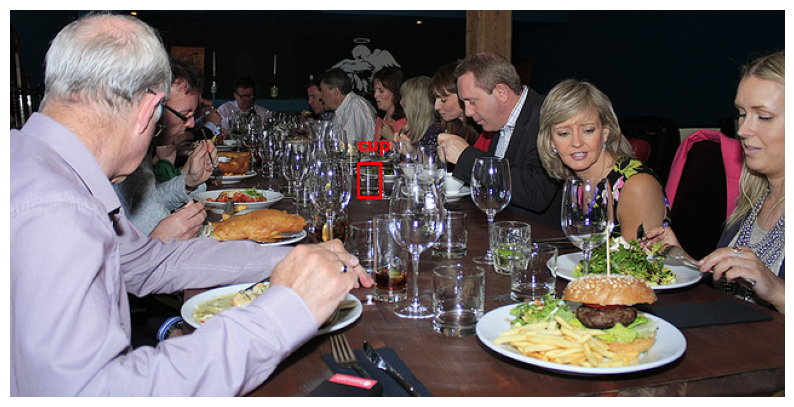

In [16]:
import random
random_image_id = random.choice(coco_data['images'])['id']
visualize_image(random_image_id)

In [17]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16634, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 16634 (delta 70), reused 105 (delta 47), pack-reused 16459
Receiving objects: 100% (16634/16634), 15.29 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (11376/11376), done.


In [18]:
%cd yolov5

/content/yolov5


pillow>=10.3.0 <br>
requests>=2.32.0

In [19]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.7/780.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.9 MB/s eta 0:00:00


In [20]:
!pip install pillow==10.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.


In [21]:
!pip install requests==2.32.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.1 MB/s eta 0:00:00
Reason for being yanked: Yanked due to conflicts with CVE-2024-35195 mitigation
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.0 which is incompatible.


In [24]:
yaml_content = """
train: /content/coco/train2017
val: /content/coco/val2017

nc: 80
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
"""

In [25]:
with open('coco.yaml', 'w') as f:
    f.write(yaml_content)

In [26]:
!cat coco.yaml


train: /content/coco/train2017  
val: /content/coco/val2017  

nc: 80  
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [33]:
!python train.py --img 640 --epochs 3 --batch 16 --data coco128.yaml --weights yolov5s.pt

2024-06-17 02:57:21.951820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 02:57:21.951872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 02:57:21.953226: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, opt

In [35]:
!python val.py --img 640 --conf 0.001 --data coco.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt

val: data=coco.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-324-gbb27bf78 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/val.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/val.py", line 409, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/val.py", line 165, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolov5/models/common.py", line 467, in __init__
    model = attempt_load(wei

In [37]:
!python train.py --img 640 --epochs 3 --data coco.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --cache

2024-06-17 03:03:17.129143: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 03:03:17.129194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 03:03:17.130892: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/runs/train/exp/weights/best.pt, cfg=, data=coco.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_sc

In [38]:
!python detect.py --source /content/coco/val2017 --weights yolov5s.pt --conf 0.4 --save-txt --save-conf --exist-ok

Streaming output truncated to the last 5000 lines.
image 4/5000 /content/coco/val2017/000000000724.jpg: 640x480 1 truck, 1 stop sign, 55.8ms
image 5/5000 /content/coco/val2017/000000000776.jpg: 640x448 2 teddy bears, 52.1ms
image 6/5000 /content/coco/val2017/000000000785.jpg: 448x640 1 person, 1 skis, 9.2ms
image 7/5000 /content/coco/val2017/000000000802.jpg: 640x448 1 oven, 1 refrigerator, 8.8ms
image 8/5000 /content/coco/val2017/000000000872.jpg: 640x640 1 person, 12.3ms
image 9/5000 /content/coco/val2017/000000000885.jpg: 448x640 3 persons, 1 tennis racket, 9.2ms
image 10/5000 /content/coco/val2017/000000001000.jpg: 480x640 11 persons, 2 tennis rackets, 47.2ms
image 11/5000 /content/coco/val2017/000000001268.jpg: 448x640 4 persons, 1 bird, 2 handbags, 9.2ms
image 12/5000 /content/coco/val2017/000000001296.jpg: 640x448 1 person, 1 cell phone, 8.8ms
image 13/5000 /content/coco/val2017/000000001353.jpg: 640x480 4 persons, 1 chair, 9.1ms
image 14/5000 /content/coco/val2017/000000001425.

In [42]:
!python /content/yolov5/val.py --data coco128.yaml --weights yolov5s.pt --task val

val: data=/content/yolov5/data/coco128.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-324-gbb27bf78 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:05<00:00,  1.42s/it]
                   all        128        929      0.689      0.634      0.709      0.476
Speed: 0.6ms pre-process, 11.4ms inference, 16.6ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val

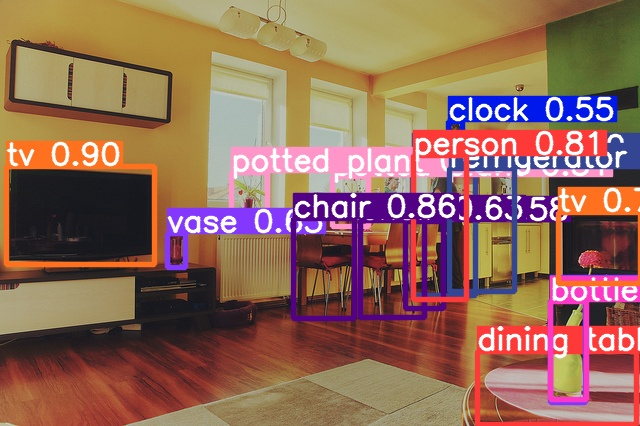

In [43]:
from IPython.display import Image

image_path = "/content/yolov5/runs/detect/exp/000000000139.jpg"

Image(image_path)

In [54]:
!zip -r /content/yolo5.zip /content/yolov5/runs/val/exp4

  adding: content/yolov5/runs/val/exp4/ (stored 0%)
  adding: content/yolov5/runs/val/exp4/val_batch1_labels.jpg (deflated 6%)
  adding: content/yolov5/runs/val/exp4/PR_curve.png (deflated 5%)
  adding: content/yolov5/runs/val/exp4/F1_curve.png (deflated 8%)
  adding: content/yolov5/runs/val/exp4/val_batch1_pred.jpg (deflated 6%)
  adding: content/yolov5/runs/val/exp4/val_batch2_labels.jpg (deflated 9%)
  adding: content/yolov5/runs/val/exp4/P_curve.png (deflated 8%)
  adding: content/yolov5/runs/val/exp4/val_batch2_pred.jpg (deflated 9%)
  adding: content/yolov5/runs/val/exp4/val_batch0_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/val/exp4/confusion_matrix.png (deflated 17%)
  adding: content/yolov5/runs/val/exp4/val_batch0_pred.jpg (deflated 8%)
  adding: content/yolov5/runs/val/exp4/R_curve.png (deflated 8%)


In [55]:
from google.colab import files
files.download("/content/yolo5.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>